# Preparing the Datasets

In this script, we will generate the six datasets that will be used throughout this project.

- **Letters192** and **Letters512**: contain the original images resized to 192×192 and 512×512 pixels respectively.

- From these, we derive:
  - **Letters_Image_and_Keypoints**: includes the original image with its corresponding keypoints.
  - **Letters_Keypoints**: contains only the keypoints over a black background without the image.

In addition, the training set will be properly split into **training** and **validation** subsets.

In [ ]:
# This script is used to install the necessary packages for the sign language project.
# %pip install Mediapipe # To install Mediapipe
# %pip install opencv-python # To process images and videos

### Testing with a Single Image

Before running the code on the entire dataset, we will first test it on a single image to better understand what the code is doing step by step.

This simple example will help us visualize and verify the process before scaling it up to all the data.


In [2]:
import cv2
import mediapipe as mp

2025-06-18 09:41:56.614157: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 09:41:56.671898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-18 09:41:57.787219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# This line assigns MediaPipe's hands module to the variable mp_hands.
# The mp.solutions.hands module is responsible for detecting hands and tracking their landmarks in images or videos.
mp_hands = mp.solutions.hands 

# This line assigns MediaPipe's drawing utilities module to the variable mp_drawing.
# The drawing utilities provide functions that help draw the detected hand landmarks and connections on images, which is useful for visualizing the results.
mp_drawing = mp.solutions.drawing_utils 

# This line creates an instance of the Hands class from the mp_hands module
# static_image_mode=True , indicates that the input will be treated as static images rather than a continuous video stream. In this mode, each image is processed independently.
# max_num_hands=2 , this limits the detection to at most two hands per image. (It can be changed to one since in our images there will be one hand at most)
# min_detection_confidence=0.5: This is the minimum confidence threshold for detecting a hand. If the model's confidence in a detected hand is below 50%, it will be ignored to reduce false positives.
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) 

I0000 00:00:1750239720.532917 1409977 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1750239720.644554 1443547 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750239720.774207 1443494 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750239720.811759 1443517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
image = cv2.imread('/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Train/A/A1.mov-img-110.jpg')
#image = cv2.imread('/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/P/P5.MOV-img-246.jpg')

image_orginial = image.copy() # Create a copy of the original image to draw on later

In [6]:
print("The shape of the image is:", image.shape)

The shape of the image is: (192, 192, 3)


The output (192, 192, 3) indicates the dimensions of the image:

192 pixels in height: The first number represents the number of rows (or vertical pixels).

192 pixels in width: The second number represents the number of columns (or horizontal pixels).

3 channels: The third number indicates that each pixel contains three values, typically corresponding to the red, green, and blue (RGB) color channels.

Since the images from Letters192 are 192x192 we will no do the resize

In [7]:
# Here, Alex resized the images with a defined width and height. In this case, I personally think I do not need it so I omit it: 
# desired_width = 192
# desired_height = 192
# Resize with defined width and height
# image_resized = cv2.resize(image, (desired_width, desired_height))

# Now we will convert the image color from BGR to RGB. OpenCV loads images using BGR format by default. However, many libraries (such as matplotlib) expect images in RGB format
# cv2.COLOR_BGR2RGB , is the conversion code that tells OpenCV to change the image from BGR (Blue, Green, Red) to RGB (Red, Green, Blue).
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
# The process() method analyzes image_rgb to detect any hands present in the image.
# It computes landmarks (specific key points on a hand) and returns them in an object called results.
results = hands.process(image_rgb)
# One of the key attributes of results is multi_hand_landmarks. This is a list that contains the landmarks for each detected hand.

W0000 00:00:1748625203.386814 3357586 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [ ]:
# print(results.multi_hand_landmarks)

In [9]:
# Draw hand keypoints
if results.multi_hand_landmarks: # This conditional checks if any hand landmarks were detected.
    for hand_landmarks in results.multi_hand_landmarks: # This loops goes through every detected hand, for each deteceted hand, hand_landmarks contains the coordinates of the keypoints
                                                        # Since we only have one hand (we could remove it)
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS) # This function draws the landmarks and the connections between them (the skeletal structure of the hand) on an image.

# Note: The drawing is applied to this image. Although processing was done on image_rgb, the drawing is done on image (often in BGR format).

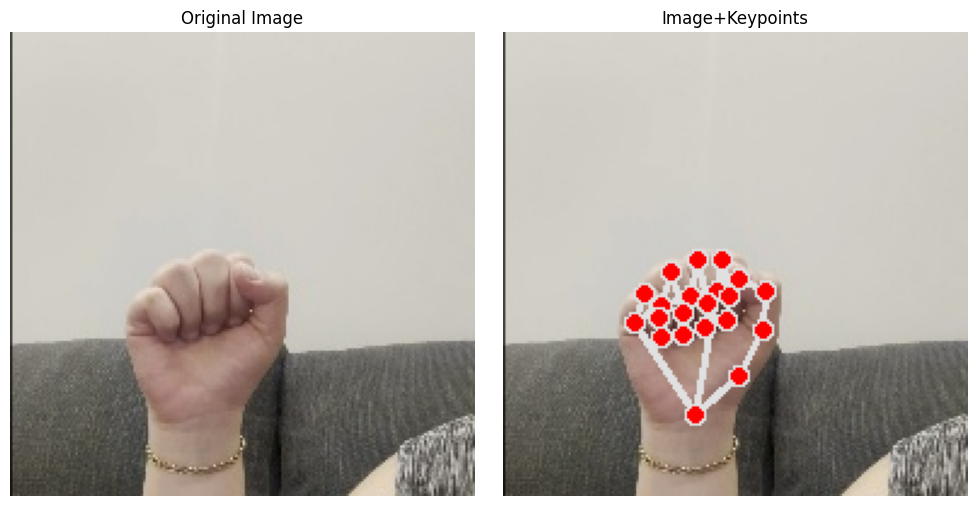

In [10]:
import cv2
import matplotlib.pyplot as plt

# Convert images from BGR to RGB
original_rgb = cv2.cvtColor(image_orginial, cv2.COLOR_BGR2RGB)
keypoints_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left: Original image
axs[0].imshow(original_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Right: Image with keypoints
axs[1].imshow(keypoints_rgb)
axs[1].set_title("Image+Keypoints")
axs[1].axis("off")

# Show the figure
plt.tight_layout()
plt.show()


Now, we compute the same easy example but getting just the KeyPoints.

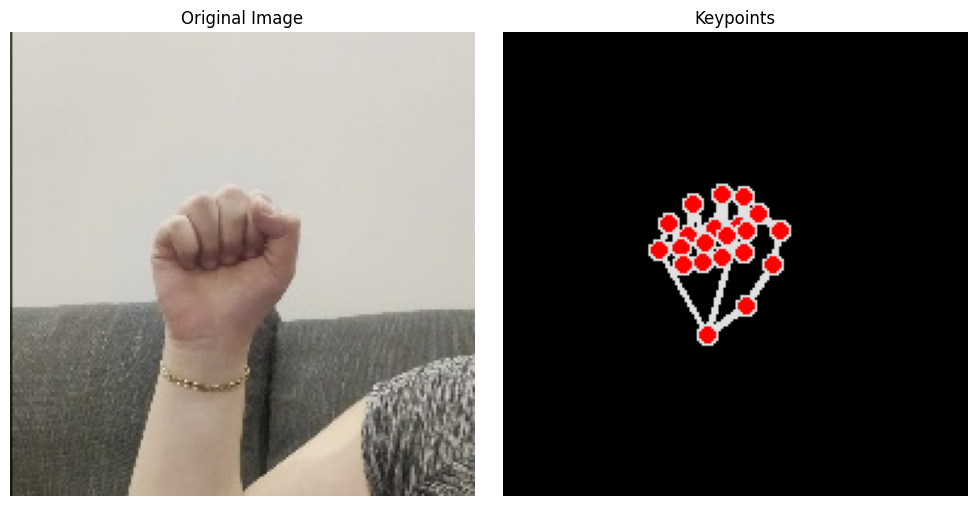

In [12]:
import numpy as np

# We can omit this lines since they were already loaded before.
# mp_hands = mp.solutions.hands # Modulo de MediaPipe que detecta manos
# mp_drawing = mp.solutions.drawing_utils # Modulo de MediaPipe
# hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) 

image = cv2.imread('/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Train/A/A1.mov-img-10.jpg')
#image = cv2.imread('/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/P/P5.MOV-img-246.jpg')
image_orginial = image.copy()

# In this case we do not need to resize the image but we will need the shape of the image
desired_width = image.shape[1]
desired_height = image.shape[0]

# Resize with defined width and height
# image_resized = cv2.resize(image, (desired_width, desired_height))


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)

if results.multi_hand_landmarks:
    black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)  # This creates an image (an array) filled with zeros, which corresponds to black in most color representations.
            
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(black_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)



original_rgb = cv2.cvtColor(image_orginial, cv2.COLOR_BGR2RGB)
keypoints = cv2.cvtColor(black_image, cv2.COLOR_BGR2RGB)

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left: Original image
axs[0].imshow(original_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Right: Image with keypoints
axs[1].imshow(keypoints)
axs[1].set_title("Keypoints")
axs[1].axis("off")

# Show the figure
plt.tight_layout()
plt.show()

### Processing the Entire Dataset

Now that we have verified the functionality with a simple example, we can move on to apply the same process to the entire dataset.
#### **Important Note**: Do not execute this code

1) It's already done, and it takes a while 
2) It is not completely right because later we see that we need to do a train and validation split


In [4]:
import sys
import os
import numpy as np

In [ ]:
# Just in case I want to remove any folder
#import shutil
#destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/any_folder_to_remove'
#if os.path.exists(destination_folder):
#      shutil.rmtree(destination_folder)
#      print(f"Removed Folder: {destination_folder}")


Removed Folder: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512


In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Train'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Image_and_Keypoints/Train'

# letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
#           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X']  # Some papers include CH, G, H, W and X as static signs, but I will include them since they are in Pamela's dataset.
                                                            # Also, looking at the signs, despite using movement, they are so different from the rest that they can be interpreted.
                                                             

letters = ['W', 'X']
# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1748630324.698213 3357327 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748630324.757728 3358673 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748630324.804317 3358623 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748630324.842581 3358645 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Train'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Keypoints/Train'

# letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
#           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 
letters = ['P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 192
        desired_height = 192
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()





I0000 00:00:1748630690.187596 3357327 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748630690.248038 3358844 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748630690.295657 3358794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748630690.341166 3358815 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Train/A/.DS_Store


Now we move on to process the 512x512 images.


In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Image_and_Keypoints/Train'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 
# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1748685012.685266 3372402 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748685012.745718 3373819 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748685012.794926 3373769 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748685012.834595 3373790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-862.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-868.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-864.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-872.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-866.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-876.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/A3.MOV-img-88.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Keypoints/Train'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 512
        desired_height = 512
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()





I0000 00:00:1745163073.958437 4181396 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745163074.030868 4186552 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1745163074.076154 4186502 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745163074.102937 4186523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/A/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/B/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/CH/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/D/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/E/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/F/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/G/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/H/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Train/I/.DS_Store
 No se pudo cargar

### Separating between Train and Validation

Before splitting the dataset into training and validation sets, we first need to analyze how the data is distributed.

Each image belongs to a specific individual, which can be identified by the prefix in the filename (e.g., `A1`, `A2`, `DSC`, etc.). It is crucial to ensure that individuals are not shared across the train and validation sets to prevent data leakage.

In this step, we will:
- Count how many individuals are present per letter.
- Count how many images each individual has.
- Compute the total number of images per letter.

In [35]:
from collections import defaultdict

base_path = 'Datasets_LSE/Letters192/Train'

letters = ['A', 'B', 'C', 'CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X']


individual_counts = {}
total_images_per_letter = {}

for letter in letters:
    letter_path = os.path.join(base_path, letter)
    image_files = os.listdir(letter_path)
    
    counts = defaultdict(int)

    for img in image_files:
        
        if img.startswith('DSC'):
            identifier = 'DSC'
        else:
            identifier = img.split('.')[0]  
        
        counts[identifier] += 1
    
    individual_counts[letter] = dict(counts)
    total_images_per_letter[letter] = sum(counts.values())


import pprint
print("Image count per individual:")
pprint.pprint(individual_counts)

print("\n Total number of images per letter:")
for letter, total in total_images_per_letter.items():
    print(f"{letter}: {total} images")


Image count per individual:
{'A': {'A1': 67,
       'A10': 312,
       'A11': 202,
       'A12': 368,
       'A13': 95,
       'A14': 110,
       'A2': 97,
       'A3': 68,
       'A4': 107,
       'A5': 148,
       'A6': 79,
       'A7': 77,
       'A8': 251,
       'A9': 120,
       'DSC': 102},
 'B': {'B1': 42,
       'B10': 348,
       'B11': 201,
       'B12': 335,
       'B13': 46,
       'B14': 60,
       'B2': 83,
       'B3': 62,
       'B4': 121,
       'B5': 153,
       'B6': 100,
       'B7': 79,
       'B8': 256,
       'B9': 126,
       'DSC': 95},
 'C': {'C1': 2450, 'C12': 500, 'C3': 69, 'DSC': 98},
 'CH': {'CH1': 44,
        'CH10': 319,
        'CH2': 88,
        'CH3': 137,
        'CH4': 154,
        'CH5': 104,
        'CH6': 73,
        'CH7': 253,
        'CH8': 142,
        'CH9': 341},
 'D': {'D1': 3230, 'D3': 70, 'DSC': 102},
 'E': {'DSC': 103,
       'E1': 65,
       'E10': 329,
       'E11': 284,
       'E12': 372,
       'E13': 73,
       'E14': 115,
       

Here we can see the total number of images per letter, the number of individuals, and how those images are distributed.

From this output, a couple of interesting and important observations can be made:

- For letters **A** and **O**, we noticed that there are 2 entries being counted as "individuals" that are not actual image files.
- These turned out to be system or hidden files like `.DS_Store`, which are automatically generated by macOS and not part of the dataset.
- To avoid issues during processing or training, we decided to **remove these files**.

In [ ]:
# To eliminate the files that are not images (those starting with a dot and are .DS_Store), we will run this code.

letter_path = 'Datasets_LSE/Letters192/Train/A' # Just change this to A for the other
image_files = os.listdir(letter_path)

weird_files = [f for f in image_files if f.startswith('.') or f.split('.')[0] == '']

print("Files starting with a .:")
for f in weird_files:
    print(f"'{f}'")

for f in weird_files:
    full_path = os.path.join(letter_path, f)
    os.remove(full_path)
    print(f"Deleted: '{f}'")

Files starting with a .:


In addition to the previously mentioned issue with system files, we also observed another problem during the analysis of the individual distribution.

For some letters such as **C, D, I, L, R, and U**, there was an error during the saving process. One of the individuals appears to have an abnormally large number of images, but upon manual inspection, it was found that the folder actually contains images from **multiple individuals**.

Because of this mislabeling, it's not possible to clearly identify separate individuals for these cases.

Since the dataset is large enough, and due to the limitations in clearly identifying distinct individuals for some letters like **U, R, L, I, D, C**, I decided to continue using between **10% and 15% of the images** for validation.

This was done **while still respecting the previous constraints**:
- Minimum of 2 individuals per validation set.
- Never exceeding 15% of the total images.
- Prioritizing clear separation between individuals.

In [ ]:
import os
import random
from collections import defaultdict

random.seed(1)

train_individuals = {}
val_individuals = {}

for letter in letters:
    indivs = individual_counts[letter]
    total_images = sum(indivs.values())
    
    target_val_min = int(0.10 * total_images)
    target_val_max = int(0.15 * total_images)

    # Shuffle of indiviudals (not images)
    indiv_list = list(indivs.items())
    random.shuffle(indiv_list)

    val_set = []
    val_count = 0

    for indiv, count in indiv_list:
        # Check if adding this individual would exceed the maximum allowed for validation
        if val_count + count > target_val_max:
            continue  # Lo saltamos
        val_set.append(indiv)
        val_count += count

        # If we reach the minimum validation count, we can stop
        # (We can stop if we have at least 2 individuals in the validation set)
        if val_count >= target_val_min and len(val_set) >= 2:
            break

    
    val_individuals[letter] = val_set
    train_individuals[letter] = [i for i in indivs if i not in val_set]

# Print the results
for letter in letters:
    val_total_imgs = sum(individual_counts[letter][i] for i in val_individuals[letter])
    train_total_imgs = sum(individual_counts[letter][i] for i in train_individuals[letter])
    print(f"Letter {letter}:")
    print(f" Val Individuals ({len(val_individuals[letter])}): {val_individuals[letter]} → {val_total_imgs} images")
    print(f" Train Individuals ({len(train_individuals[letter])}): {train_individuals[letter]} → {train_total_imgs} images")
    print(f" Total: {val_total_imgs + train_total_imgs} images\n")


Letter A:
 Val Individuals (3): ['DSC', 'A6', 'A1'] → 248 images
 Train Individuals (12): ['A10', 'A11', 'A12', 'A13', 'A14', 'A2', 'A3', 'A4', 'A5', 'A7', 'A8', 'A9'] → 1955 images
 Total: 2203 images

Letter B:
 Val Individuals (2): ['B11', 'B7'] → 280 images
 Train Individuals (13): ['B1', 'B10', 'B12', 'B13', 'B14', 'B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'DSC'] → 1827 images
 Total: 2107 images

Letter C:
 Val Individuals (2): ['C3', 'DSC'] → 167 images
 Train Individuals (2): ['C1', 'C12'] → 2950 images
 Total: 3117 images

Letter CH:
 Val Individuals (2): ['CH2', 'CH8'] → 230 images
 Train Individuals (8): ['CH1', 'CH10', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH9'] → 1425 images
 Total: 1655 images

Letter D:
 Val Individuals (2): ['D3', 'DSC'] → 172 images
 Train Individuals (1): ['D1'] → 3230 images
 Total: 3402 images

Letter E:
 Val Individuals (2): ['E9', 'E6'] → 236 images
 Train Individuals (13): ['DSC', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E2', 'E3', 'E4', 'E5', 'E7

Now we can proceed to create the split of the Train set in TrainV and Validation.
We start with the original 192x192 Dataset

In [ ]:
import os
import shutil

original_base = 'Datasets_LSE/Letters192/Train'
output_train = 'Datasets_LSE/Letters192/TrainV'
output_val = 'Datasets_LSE/Letters192/Validation'

# Create output directories if they do not exist
os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)

for letter in letters:
    # Create directories for each letter in TrainV and Validation
    os.makedirs(os.path.join(output_train, letter), exist_ok=True)
    os.makedirs(os.path.join(output_val, letter), exist_ok=True)

    # List files in the letter directory
    letter_path = os.path.join(original_base, letter)
    image_files = os.listdir(letter_path)

    for img in image_files:
        if img.startswith('DSC'):
            indiv = 'DSC'
        else:
            indiv = img.split('.')[0]  # A1, A2.

        src_path = os.path.join(letter_path, img)

        # Determine destination path based on whether the individual is in the validation set
        if indiv in val_individuals[letter]:
            dst_path = os.path.join(output_val, letter, img)
        else:
            dst_path = os.path.join(output_train, letter, img)

        # Copy the file to the appropriate destination
        shutil.copyfile(src_path, dst_path)

print(" Images successfully split into TrainV and Validation folders.")


 Images successfully split into TrainV and Validation folders.


After doing this split, I actually need to do the MediaPipe implementation again to make sure that the splits are exactly the same across all the datasets.

So I start with TrainV of the Image+Keypoint

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/TrainV'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Image_and_Keypoints/TrainV'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X']

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1743446956.293297  661071 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743446956.382898 1911137 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1743446956.442469 1911085 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743446956.478503 1911113 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


And now the validation of Image+Keypoints

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Validation'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Image_and_Keypoints/Validation'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1743453253.881807  661071 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743453253.973758 1912044 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1743453254.018491 1912004 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743453254.051766 1912017 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Now, for just the Keypoints dataset, firstly the TrainV

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/TrainV'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Keypoints/TrainV'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 192
        desired_height = 192
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()





I0000 00:00:1748680381.225170 3372402 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748680381.285987 3372800 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748680381.335762 3372752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748680381.356368 3372676 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:00:1748680381.382315 3372773 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


And the Validation

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192/Validation'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters192_Keypoints/Validation'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 192
        desired_height = 192
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()





I0000 00:00:1748683916.697553 3372402 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748683916.758241 3373548 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748683916.804802 3373496 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748683916.844840 3373519 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Now we do the split in TrainV and Validation in the 512x512 dataset

As well as before, we explore the individuals of each folder to check for errors.

In [29]:
from collections import defaultdict

base_path = 'Datasets_LSE/Letters512/Train'

letters = ['A', 'B', 'C', 'CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X']


individual_counts = {}
total_images_per_letter = {}

for letter in letters:
    letter_path = os.path.join(base_path, letter)
    image_files = os.listdir(letter_path)
    
    counts = defaultdict(int)

    for img in image_files:
        
        if img.startswith('DSC'):
            identifier = 'DSC'
        else:
            identifier = img.split('.')[0]  
        
        counts[identifier] += 1
    
    individual_counts[letter] = dict(counts)
    total_images_per_letter[letter] = sum(counts.values())


import pprint
print("Image count per individual:")
pprint.pprint(individual_counts)

print("\n Total number of images per letter:")
for letter, total in total_images_per_letter.items():
    print(f"{letter}: {total} images")


Image count per individual:
{'A': {'A1': 142,
       'A10': 286,
       'A11': 185,
       'A12': 308,
       'A13': 17,
       'A14': 31,
       'A15': 163,
       'A2': 257,
       'A3': 283,
       'A4': 317,
       'A5': 298,
       'A6': 218,
       'A7': 162,
       'A8': 575,
       'A80': 70,
       'A9': 275},
 'B': {'B1': 169,
       'B10': 224,
       'B11': 138,
       'B12': 164,
       'B13': 10,
       'B14': 47,
       'B15': 165,
       'B2': 229,
       'B3': 248,
       'B4': 303,
       'B5': 195,
       'B6': 283,
       'B7': 229,
       'B8': 427,
       'B80': 57,
       'B9': 231},
 'C': {'C1': 350,
       'C15': 156,
       'C2': 485,
       'C3': 341,
       'C4': 501,
       'C5': 414,
       'C6': 383,
       'C80': 66},
 'CH': {'CH1': 139,
        'CH15': 175,
        'CH2': 252,
        'CH3': 534,
        'CH4': 247,
        'CH5': 466,
        'CH6': 193,
        'CH7': 517,
        'CH8': 314,
        'CH9': 327},
 'D': {'D1': 435,
       'D15': 33,
  

In the next cell, one can drop any file that is an error:

In [ ]:
# To eliminate the files that are not images (those starting with a dot and are .DS_Store), we will run this code.
# letter_path = 'Datasets_LSE/Letters512/Train/X' # Just change this to A for the other
# image_files = os.listdir(letter_path)

# weird_files = [f for f in image_files if f.startswith('.') or f.split('.')[0] == '']

# print("Files starting with a .:")
# for f in weird_files:
#     print(f"'{f}'")

# for f in weird_files:
#     full_path = os.path.join(letter_path, f)
#     os.remove(full_path)
#     print(f"Deleted: '{f}'")

Files starting with a .:
'.DS_Store'
Deleted: '.DS_Store'


In the next cell, the division between TrainV and Validation is made.
This was done **while still respecting the previous constraints**:
- Minimum of 2 individuals per validation set.
- Never exceeding 15% of the total images.
- Prioritizing clear separation between individuals.

In [ ]:
import os
import random
from collections import defaultdict

random.seed(1)

train_individuals = {}
val_individuals = {}

for letter in letters:
    indivs = individual_counts[letter]
    total_images = sum(indivs.values())
    
    target_val_min = int(0.10 * total_images)
    target_val_max = int(0.15 * total_images)

    # Shuffle of indiviudals (not images)
    indiv_list = list(indivs.items())
    random.shuffle(indiv_list)

    val_set = []
    val_count = 0

    for indiv, count in indiv_list:
        # Check if adding this individual would exceed the maximum allowed for validation
        if val_count + count > target_val_max:
            continue  # Lo saltamos
        val_set.append(indiv)
        val_count += count

        # If we reach the minimum validation count, we can stop
        if val_count >= target_val_min and len(val_set) >= 2:
            break

    
    val_individuals[letter] = val_set
    train_individuals[letter] = [i for i in indivs if i not in val_set]

# Print the results
for letter in letters:
    val_total_imgs = sum(individual_counts[letter][i] for i in val_individuals[letter])
    train_total_imgs = sum(individual_counts[letter][i] for i in train_individuals[letter])
    print(f"Letter {letter}:")
    print(f" Val Individuals ({len(val_individuals[letter])}): {val_individuals[letter]} → {val_total_imgs} images")
    print(f" Train Individuals ({len(train_individuals[letter])}): {train_individuals[letter]} → {train_total_imgs} images")
    print(f" Total: {val_total_imgs + train_total_imgs} images\n")


Letter A:
 Val Individuals (2): ['A11', 'A5'] → 483 images
 Train Individuals (14): ['A1', 'A10', 'A12', 'A13', 'A14', 'A15', 'A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A80', 'A9'] → 3104 images
 Total: 3587 images

Letter B:
 Val Individuals (3): ['B11', 'B12', 'B14'] → 349 images
 Train Individuals (13): ['B1', 'B10', 'B13', 'B15', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B80', 'B9'] → 2770 images
 Total: 3119 images

Letter C:
 Val Individuals (1): ['C3'] → 341 images
 Train Individuals (7): ['C1', 'C15', 'C2', 'C4', 'C5', 'C6', 'C80'] → 2355 images
 Total: 2696 images

Letter CH:
 Val Individuals (2): ['CH2', 'CH15'] → 427 images
 Train Individuals (8): ['CH1', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9'] → 2737 images
 Total: 3164 images

Letter D:
 Val Individuals (2): ['D6', 'D15'] → 473 images
 Train Individuals (7): ['D1', 'D2', 'D3', 'D4', 'D5', 'D7', 'D80'] → 2828 images
 Total: 3301 images

Letter E:
 Val Individuals (2): ['E1', 'E10'] → 400 images
 Train Individuals (14): 

As well as in 192x192, once we now which individuals go to TrainV and which individuals go to Validation, the split is made:

In [ ]:
import os
import shutil

original_base = 'Datasets_LSE/Letters512/Train'
output_train = 'Datasets_LSE/Letters512/TrainV'
output_val = 'Datasets_LSE/Letters512/Validation'

# Create output directories if they do not exist
os.makedirs(output_train, exist_ok=True)
os.makedirs(output_val, exist_ok=True)

for letter in letters:
    # Create directories for each letter in TrainV and Validation
    os.makedirs(os.path.join(output_train, letter), exist_ok=True)
    os.makedirs(os.path.join(output_val, letter), exist_ok=True)

    # List files in the letter directory
    letter_path = os.path.join(original_base, letter)
    image_files = os.listdir(letter_path)

    for img in image_files:
        if img.startswith('DSC'):
            indiv = 'DSC'
        else:
            indiv = img.split('.')[0]  # A1, A2.

        src_path = os.path.join(letter_path, img)

        # Determine destination path based on whether the individual is in the validation set
        if indiv in val_individuals[letter]:
            dst_path = os.path.join(output_val, letter, img)
        else:
            dst_path = os.path.join(output_train, letter, img)

        # Copy the file to the appropriate destination
        shutil.copyfile(src_path, dst_path)

print(" Images successfully split into TrainV and Validation folders.")


 Images successfully split into TrainV and Validation folders.


Nos we do the MediaPipe implementation again in order to have the same division in all the datasets

First, TrainV for Image_and_Keypoints

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Image_and_Keypoints/TrainV'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1748726955.294979 3384133 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748726955.355385 3384572 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748726955.407442 3384520 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748726955.437922 3384423 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:00:1748726955.451199 3384543 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-862.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-868.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-864.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-872.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-866.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-876.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-88.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV/A/A3.MOV-img-882.jpg
 No se pudo cargar la imagen: /home/ignacio_marro

And now Validation for Image_and_Keypoints

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Image_and_Keypoints/Validation'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1748731694.197550 3384133 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748731694.257542 3385577 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748731694.306436 3385527 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748731694.344053 3385548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-0.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-10.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1018.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1020.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1022.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1026.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1016.jpg
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation/A/A5.MOV-img-1030.jpg
 No se pudo c

Finally, TrainV for Keypoints

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/TrainV'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Keypoints/TrainV'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 512
        desired_height = 512
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()


I0000 00:00:1745176230.405211 4181396 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745176230.473311    5719 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1745176230.515244    5667 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745176230.547616    5694 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


And Validation for Keypoints

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Validation'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Keypoints/Validation'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 512
        desired_height = 512
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()



I0000 00:00:1748358605.268911 2106915 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748358605.332511 2109714 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1748358605.383042 2109666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748358605.429255 2109684 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In this point, all the datasets needed for training and testing all models are done.

The last things that will be implemented in this code will be the MediaPipe transformations of the Test set, just for the models that will actually use the Test set (just the best model).

That is why, now we compute the MediaPipe transofrmation of Test in Letters512 to Letters512_Image_and_Keypoints, because the best model was obtained using that dataset.

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Image_and_Keypoints/Test'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, image)

mp_hands.close()

I0000 00:00:1750021956.254912 4151333 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1750021956.318704 4151697 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1750021956.388444 4151646 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750021956.433532 4151580 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:00:1750021956.436779 4151669 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/B/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/C/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/D/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/G/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/H/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/M/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/N/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/P/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/Q/.DS_Store
 No se pudo cargar la imagen

(Since in the web implementation using the Image+Keypoints model was a bit worse (because of the time it takes to process keypoint+image), the second best model was used. So we needed to compute the Mediapipe transformation of the Test set in order to get the Keypoints-only dataset)

In [ ]:
train_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test'

destination_folder = '/home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512_Keypoints/Test'

letters = ['A', 'B', 'C','CH', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'] 

# Instantiate Hands object outside the loop
mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

for letter in letters:
    folder_path = os.path.join(train_folder, letter)
    
    if not os.path.exists(folder_path):
        print(f"No existe la carpeta: {folder_path}")
        continue

    files = os.listdir(folder_path)
    
    for file in files:

        # Filter out .ipynb_checkpoints directory
        if file.startswith('._'):
            continue
        
        picture_path = os.path.join(folder_path, file)
        
        image = cv2.imread(picture_path)
        
        if image is None:
            print(f" No se pudo cargar la imagen: {picture_path}")
            continue
        
        #desired_width = 200
        #desired_height = 200

        # image_resized = cv2.resize(image, (desired_width, desired_height))
        # image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        results = hands.process(image_rgb)
        desired_width = 512
        desired_height = 512
        
        if results.multi_hand_landmarks:
            black_image = np.zeros((desired_height, desired_width, 3), dtype=np.uint8)
            
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(black_image, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS)
                   
            save_path = os.path.join(destination_folder, letter, file)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, black_image)

mp_hands.close()



I0000 00:00:1750239728.786623 1409977 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1750239728.858516 1443674 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 565.57.01), renderer: Tesla T4/PCIe/SSE2
W0000 00:00:1750239728.893042 1443624 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750239728.924981 1443645 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750239729.120841 1443503 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/B/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/C/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/D/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/G/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/H/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/M/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/N/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/P/.DS_Store
 No se pudo cargar la imagen: /home/ignacio_marroquin/signlanguage/Datasets_LSE/Letters512/Test/Q/.DS_Store
 No se pudo cargar la imagen